In [ ]:
import toml

with open("api_keys.toml") as f:
    api_keys = toml.load(f)

'e555a6353482760719121abf23e2f7d5'

とりあえず取得を試す。 https://openweathermap.org/api/hourly-forecast#example_JSON

Free callを極力消費しないように、cache付きのrequestsを使え。

In [ ]:
import requests_cache

# デバッグのためのツール
from icecream import ic

# Kanagawa Environmental Research Center
KERC_location = dict(lat=35.3475607, lon=139.3514103)

# cached session prepare
cache_session = requests_cache.CachedSession("openweathermap")

# One Call API 3.0, available for free.
URL = "https://pro.openweathermap.org/data/3.0/onecall?lat={lat}&lon={lon}&appid={API_key}"

url = URL.format(
    lon=KERC_location["lon"],
    lat=KERC_location["lat"],
    API_key=api_keys["openweathermap"],
)

jsondata = cache_session.get(url).json()
ic(jsondata)

ic| jsondata: {'alerts': [{'description': '',
                           'end': 1738422000,
                           'event': '乾燥注意報',
                           'sender_name': 'JMA',
                           'start': 1738249201,
                           'tags': ['Air quality']}],
               'current': {'clouds': 67,
                           'dew_point': 276.32,
                           'dt': 1738388212,
                           'feels_like': 284.02,
                           'humidity': 54,
                           'pressure': 1020,
                           'sunrise': 1738359739,
                           'sunset': 1738397390,
                           'temp': 285.34,
                           'uvi': 0.48,
                           'visibility': 10000,
                           'weather': [{'description': 'broken clouds',
                                        'icon': '04d',
                                        'id': 803,
                                 

{'lat': 35.3476,
 'lon': 139.3514,
 'timezone': 'Asia/Tokyo',
 'timezone_offset': 32400,
 'current': {'dt': 1738388212,
  'sunrise': 1738359739,
  'sunset': 1738397390,
  'temp': 285.34,
  'feels_like': 284.02,
  'pressure': 1020,
  'humidity': 54,
  'dew_point': 276.32,
  'uvi': 0.48,
  'clouds': 67,
  'visibility': 10000,
  'wind_speed': 2.96,
  'wind_deg': 139,
  'wind_gust': 2.28,
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04d'}]},
 'minutely': [{'dt': 1738388220, 'precipitation': 0},
  {'dt': 1738388280, 'precipitation': 0},
  {'dt': 1738388340, 'precipitation': 0},
  {'dt': 1738388400, 'precipitation': 0},
  {'dt': 1738388460, 'precipitation': 0},
  {'dt': 1738388520, 'precipitation': 0},
  {'dt': 1738388580, 'precipitation': 0},
  {'dt': 1738388640, 'precipitation': 0},
  {'dt': 1738388700, 'precipitation': 0},
  {'dt': 1738388760, 'precipitation': 0},
  {'dt': 1738388820, 'precipitation': 0},
  {'dt': 1738388880, 'precipitat

とってきたい項目は?

* 気温
* (湿度)
* 風速風向
* 日照または天候コード




In [ ]:
# OpenMeteoで取得していた項目
OPENMETEO_ITEMS = (
    "temperature_2m",
    "weather_code",
    "cloud_cover",
    "wind_speed_10m",
    "pressure_msl",
    "shortwave_radiation",
)

OPENWM_ITEMS = (
    "temp",
    "weather_code",  # これは複層になってる
    "cloud_cover",
    "wind_speed_10m",
    "pressure_msl",
    # "shortwave_radiation", # このデータはない。
)

ic(jsondata["hourly"][0]["temp"])
ic(jsondata["hourly"][0]["weather"][0]["id"])
ic(jsondata["hourly"][0]["clouds"])
ic(jsondata["hourly"][0]["wind_speed"])
ic(jsondata["hourly"][0]["pressure"])

jsondata["hourly"][0]

ic| jsondata["hourly"][0]["temp"]: 284.74
ic| jsondata["

hourly"][0]["weather"][0]["id"]: 803
ic| jsondata["hourly"][0]["clouds"]: 66
ic| jsondata["hourly"][0]["wind_speed"]: 2.27
ic| jsondata["hourly"][0]["pressure"]: 1020


{'dt': 1738386000,
 'temp': 284.74,
 'feels_like': 283.31,
 'pressure': 1020,
 'humidity': 52,
 'dew_point': 275.23,
 'uvi': 1.07,
 'clouds': 66,
 'visibility': 10000,
 'wind_speed': 2.27,
 'wind_deg': 137,
 'wind_gust': 1.51,
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'pop': 0}

Text(0, 0.5, 'Temperature / °C')

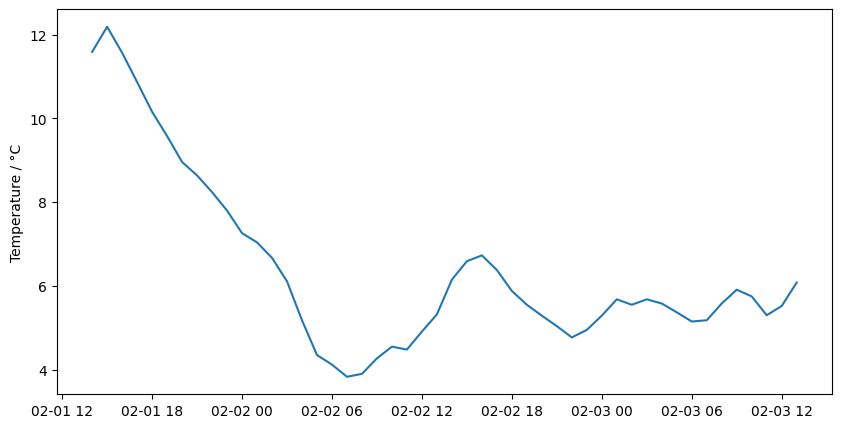

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

keys = jsondata["hourly"][0].keys()
rec_wise = dict()
for key in keys:
    rec_wise[key] = np.array([rec[key] for rec in jsondata["hourly"]])

rec_wise["datetime"] = [datetime.fromtimestamp(x) for x in rec_wise["dt"]]


fig = plt.figure(figsize=(10, 5))
plt.plot(rec_wise["datetime"], rec_wise["temp"] - 273.15)
plt.ylabel("Temperature / °C")